In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy.io import fits
from scipy.interpolate import interp1d
from kbastroutils.gnd import GND
from kbastroutils.mag2flux import mag2flux

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
The following tasks in the acstools package can be run with TEAL:
          acs2d                  acs_destripe           acs_destripe_plus     
          acsccd                    acscte              acscteforwardmodel    
          acsrej                    acssum                    calacs
PixCteCorr is no longer supported. Please use acscte.


In [2]:
FILE_LIST = {'G800L': ['/Users/kbhirombhakdi/_work/___WR96_PID15401_stable/WR96PID15401G800L_01.pickle',
                       '/Users/kbhirombhakdi/_work/___WR96_PID15401_stable/WR96PID15401G800L_02.pickle']
            }

BOUND = {'G800L': (5500.,10500.)
        }

STANDARD = (5696.,6560.,7234.,8196.,8337.,8500.,8664.)


7693.2 3.5356386067013463e-14
7693.2 3.637020636028956e-14
7693.2 3.7717868883545413e-14


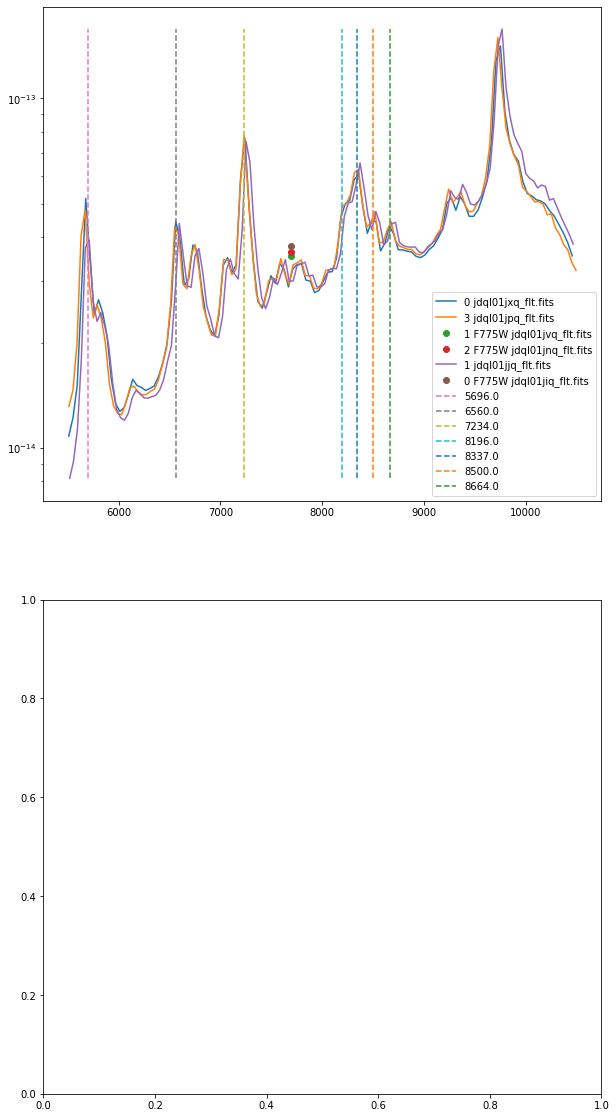

In [3]:
n = 2
fig,ax = plt.subplots(n,1,figsize=(10,n*10))
for i,ii in enumerate(FILE_LIST):
    if not FILE_LIST[ii]:
        continue
    for iii in FILE_LIST[ii]:
        f = open(iii,'rb')
        OUTPUT = pickle.load(f)
        f.close()
        flammin,flammax=None,None
        for j in OUTPUT.pairs:
            for k in OUTPUT.pairs[j]:
                WAVE,FLAM = OUTPUT.meta[k]['WW'],OUTPUT.meta[k]['FLAM']
                m = np.where((WAVE>=BOUND[ii][0]) & (WAVE<=BOUND[ii][1]))       
                ax[0].plot(WAVE[m],FLAM[m],label='{0} {1}'.format(k,OUTPUT.files[k].split('/')[-1]))
                flammin,flammax = np.min(FLAM[m]),np.max(FLAM[m])
    
        for j in OUTPUT.did:
            try:
                abmag,eabmag = OUTPUT.meta[j]['ABMAG'][0],OUTPUT.meta[j]['ABMAG'][1]
                wave = OUTPUT.meta[j]['PHOT_PARAMS']['ZP'][0]
                filt = OUTPUT.meta[j]['PHOT_PARAMS']['FILTER']
                print(wave,mag2flux(abmag,wave))
                ax[0].plot(wave,mag2flux(abmag,wave),'o',alpha=1.,label='{0} {1} {2}'.format(j,filt,OUTPUT.files[j].split('/')[-1]))
            except:
                pass
        
for i in STANDARD:
    ax[0].plot([i,i],[flammin,flammax],'--',label='{0}'.format(i))
            
ax[0].set_yscale('log')
ax[0].legend()